## Visualising Track Data

The factors we have from get_track_info include:
* track name
* artist
* track popularity
* tempo
* danceability
* user who added

Therefore we will determine average tempo of user's music taste, how niche their taste is and how lively it is.

Could also perhaps determine age of music taste in future

In [28]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

track_info = pd.read_csv('data/track_info.csv').drop('Unnamed: 0', axis=1)
display(track_info.head())

,track_name,artist,track_pop,tempo,danceability,user
0,WAITING,WOODZ,54,158.179,0.586,Mikaela
1,Stripped,Depeche Mode,53,180.626,0.474,Giles
2,There's No Way Out of Here,David Gilmour,49,130.854,0.489,Giles
3,Just an Illusion,Imagination,62,105.125,0.752,Giles
4,San Andreas Fault,Natalie Merchant,47,157.787,0.754,Giles


In [87]:
#Cold facts
dance_facts = {'person': 'no_one', 'score': 0}
niche_facts = {'person': 'no_one', 'score': 100}
pop_facts = {'person': 'no_one', 'score': 0}

for user in track_info['user'].unique():
    danceability = track_info.loc[track_info['user']==user]['danceability'].median()
    print(f'{user}\'s median danceability: {danceability}')
    
    tempo = track_info.loc[track_info['user']==user]['tempo'].median()
    print(f'{user}\'s median tempo: {tempo}')
    
    popularity = track_info.loc[track_info['user']==user]['track_pop'].median()
    print(f'{user}\'s median track popularity: {popularity}')
    
    print('\n')
    
    if (danceability > dance_facts['score']):
        dance_facts['person'] = user
        dance_facts['score'] = danceability
    
    if (popularity < niche_facts['score']):
        niche_facts['person'] = user
        niche_facts['score'] = popularity
        
    if (popularity > pop_facts['score']):
        pop_facts['person'] = user
        pop_facts['score'] = popularity
        
most_niche = niche_facts['person']
most_dance = dance_facts['person']
most_pop = pop_facts['person']

print(f'Most niche taste belongs to: {most_niche}')
print(f'Most danceable taste belongs to: {most_dance}')
print(f'Most popular taste belongs to: {most_pop}')


Mikaela's median danceability: 0.596
Mikaela's median tempo: 121.517
Mikaela's median track popularity: 67.5


Giles's median danceability: 0.6045
Giles's median tempo: 131.3775
Giles's median track popularity: 50.0


Vanessa's median danceability: 0.638
Vanessa's median tempo: 115.003
Vanessa's median track popularity: 61.0


Most niche taste belongs to: Giles
Most danceable taste belongs to: Vanessa
Most popular taste belongs to: Mikaela


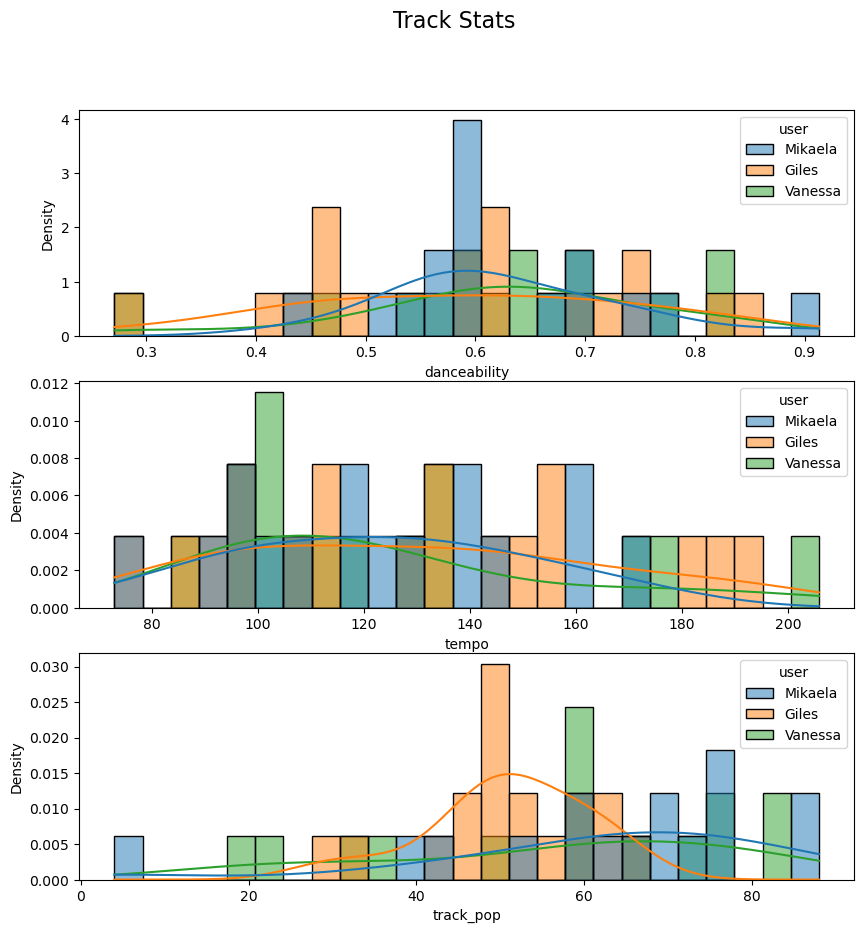

In [65]:
#Some graphs
fig, axs = plt.subplots(nrows=3, figsize=(10, 10))

sns.histplot(data=track_info,
             x="danceability",
             hue = "user",
             stat="density",    # normalize the histogram so that the total area of bars is 1
             kde=True,          # plot kernel density estimate
             bins=25, # number of bins of the histogram,
             ax=axs[0]
            )

sns.histplot(data=track_info,
             x="tempo",
             hue = "user",
             stat="density",    # normalize the histogram so that the total area of bars is 1
             kde=True,          # plot kernel density estimate
             bins=25, # number of bins of the histogram,
             ax=axs[1]
            )

sns.histplot(data=track_info,
             x="track_pop",
             hue = "user",
             stat="density",    # normalize the histogram so that the total area of bars is 1
             kde=True,          # plot kernel density estimate
             bins=25, # number of bins of the histogram,
             ax=axs[2]
            )

fig.suptitle('Track Stats', fontsize=16)

plt.show()

In [81]:
track_info.loc[track_info['tempo'] == track_info['tempo'].min()]

,track_name,artist,track_pop,tempo,danceability,user
21,FEVER,ENHYPEN,76,72.999,0.6,Mikaela


In [82]:
track_info.loc[track_info['track_pop'] == track_info['track_pop'].min()]

,track_name,artist,track_pop,tempo,danceability,user
47,Lost,Frank Ocean,4,123.061,0.913,Mikaela


In [85]:
track_info.loc[track_info['danceability'] == track_info['danceability'].min()]

,track_name,artist,track_pop,tempo,danceability,user
39,Fairytale of New York (feat. Kirsty MacColl),The Pogues,45,78.111,0.271,Giles
